In [38]:

from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica dataset Iris da sklearn
iris = load_iris()

# Converte in DataFrame Pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Mappa numeri -> nomi specie
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [39]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


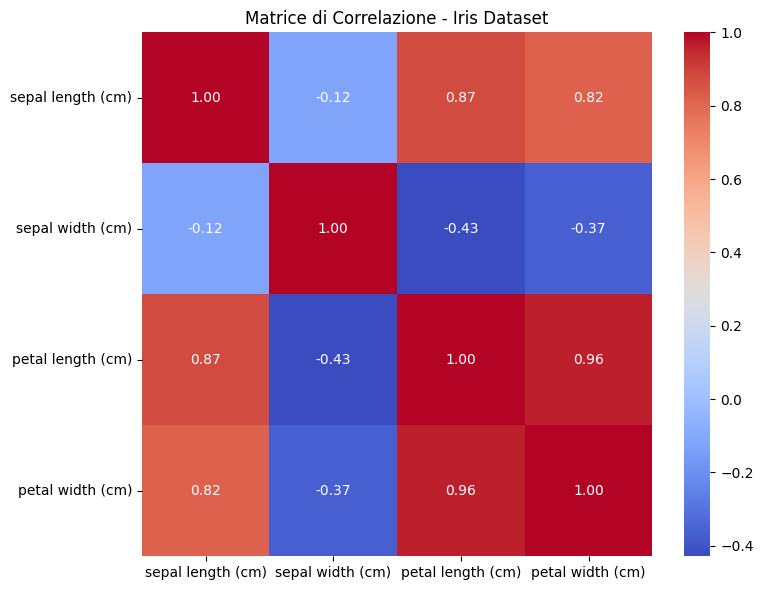

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['target','species']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice di Correlazione - Iris Dataset")
plt.tight_layout()
plt.show()


### Matrice di Correlazione - Iris Dataset

La heatmap mostra le relazioni tra le variabili:
- **Petal length** e **petal width** hanno una correlazione molto alta (~0.96).
- **Sepal length** è moderatamente correlato con le misure dei petali.
- **Sepal width** ha correlazioni più deboli e in parte negative con altre variabili.

Queste relazioni suggeriscono che le dimensioni dei petali sono fortemente legate tra loro e sono ottimi predittori per distinguere le specie.


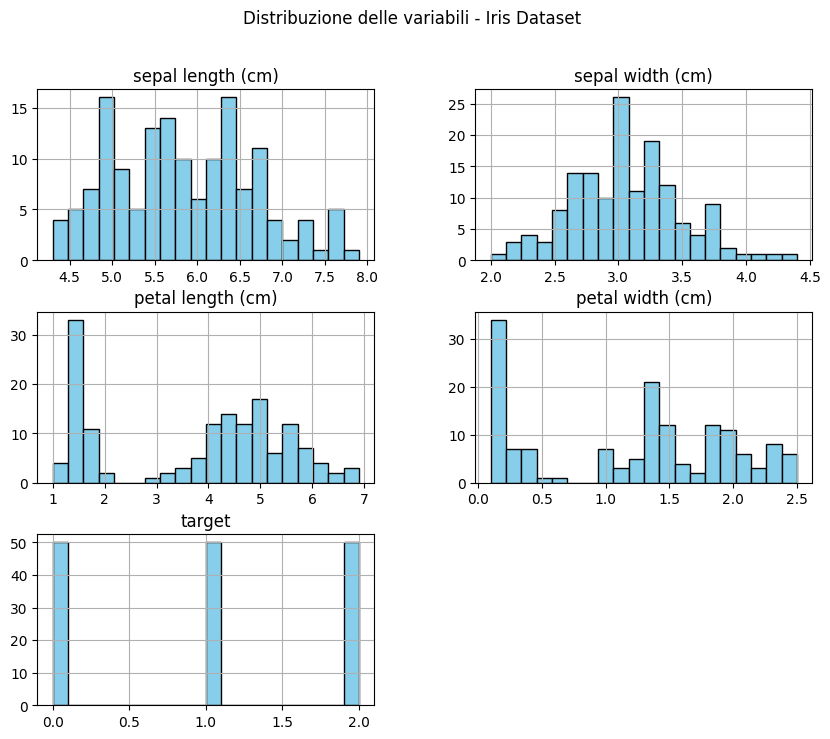

In [42]:
df.iloc[:, :-1].hist(bins=20, figsize=(10,8), color='skyblue', edgecolor='black')
plt.suptitle("Distribuzione delle variabili - Iris Dataset")
plt.show()

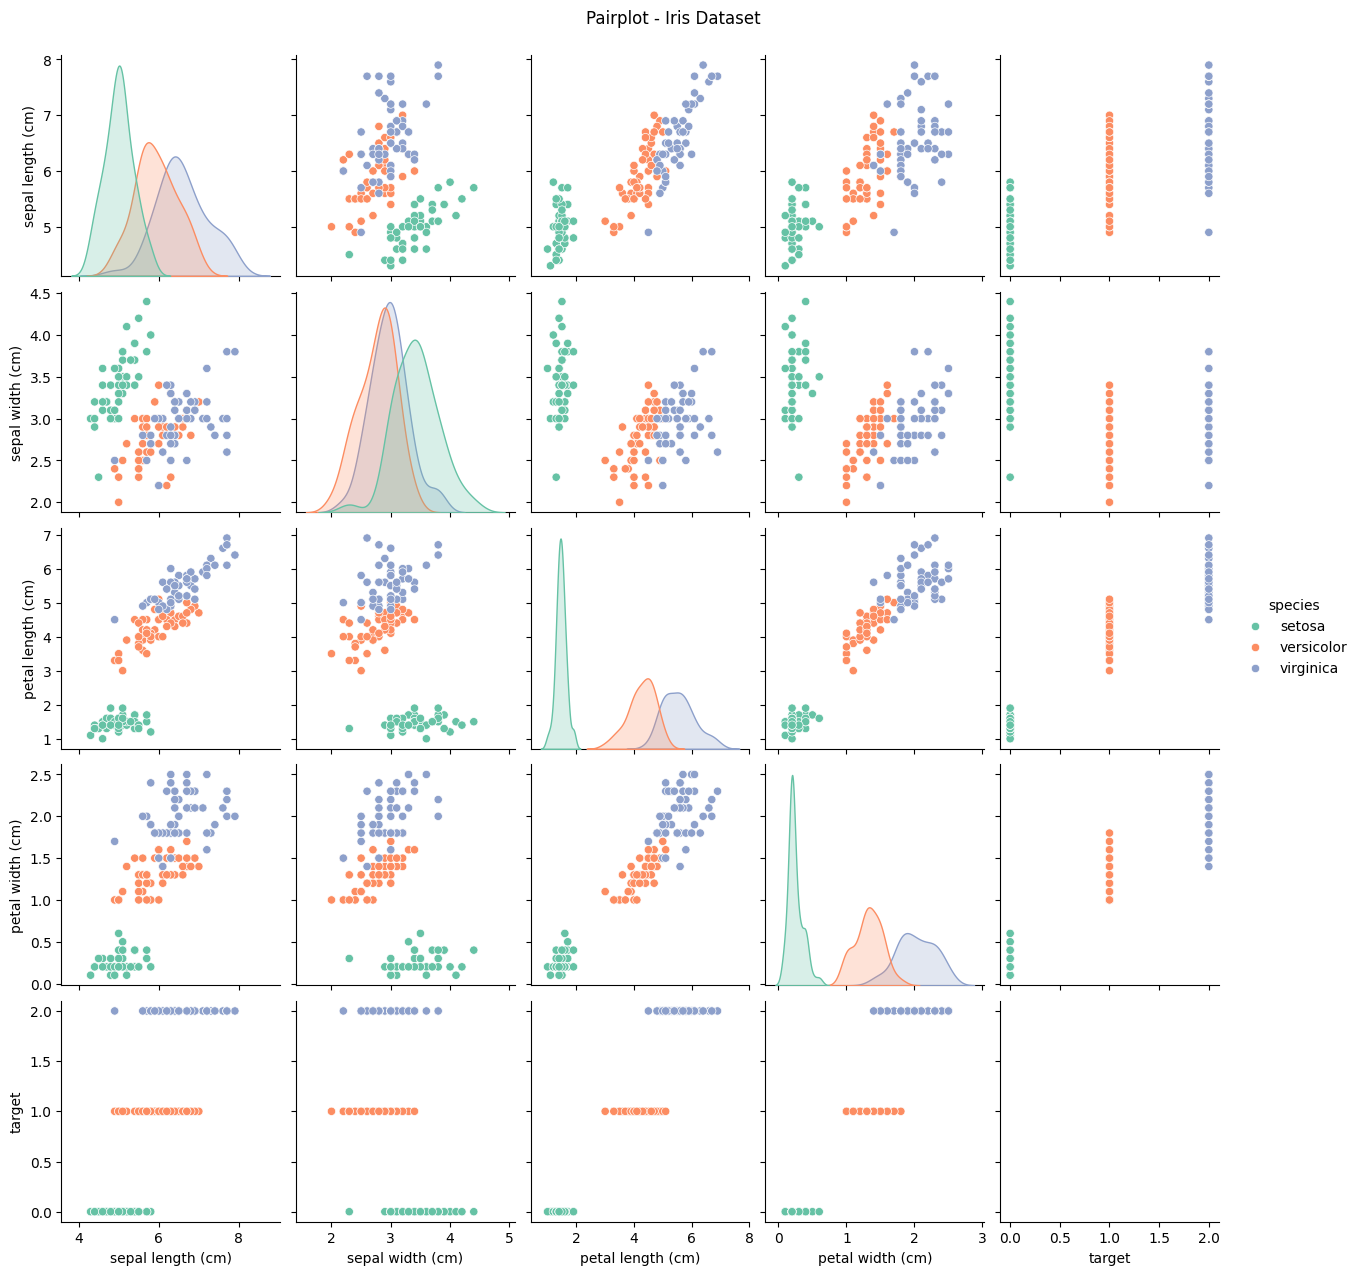

In [43]:
sns.pairplot(df, hue="species", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot - Iris Dataset", y=1.02)
plt.show()


### Relazione Sepal Length vs Sepal Width

Dallo scatterplot colorato per specie:
- **Setosa** si distingue nettamente con sepal width più alto e sepal length più basso.
- **Versicolor** e **Virginica** si sovrappongono parzialmente, ma Virginica tende ad avere sepal length maggiore.
- La separabilità tra classi è più evidente se si considerano le variabili dei petali.

Questo conferma che le misure dei sepali da sole non bastano per una classificazione perfetta, ma danno comunque indizi utili.


C:\Users\39392\AppData\Local\Temp\ipykernel_4068\3270591779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="sepal length (cm)", data=df, palette="Set3")


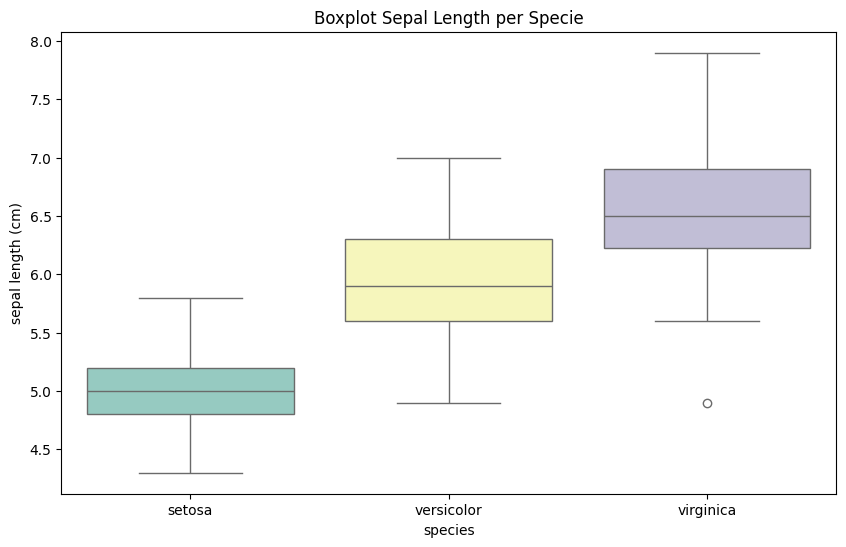

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x="species", y="sepal length (cm)", data=df, palette="Set3")
plt.title("Boxplot Sepal Length per Specie")
plt.show()


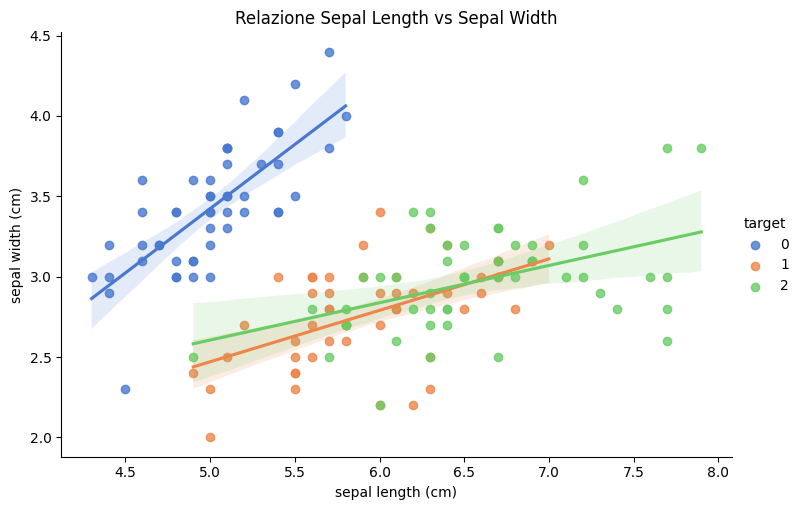

In [45]:
sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", data=df, aspect=1.5, palette="muted")
plt.title("Relazione Sepal Length vs Sepal Width")
plt.show()

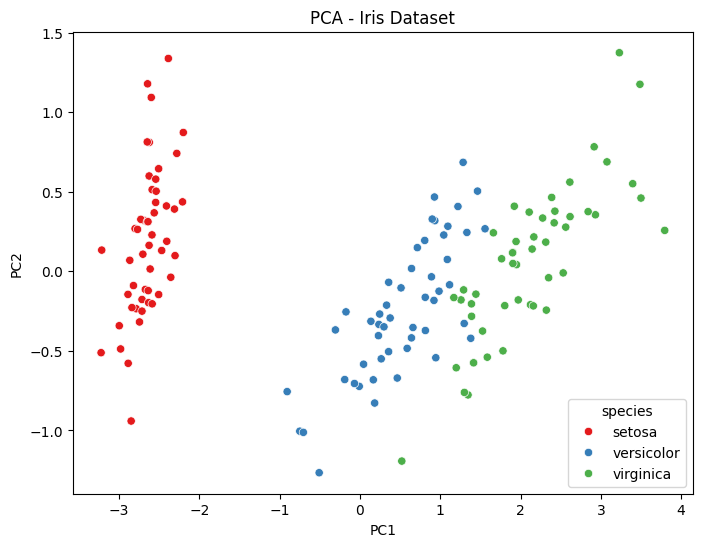

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(df.iloc[:, :-2])  # escludi target e species
df_pca = pd.DataFrame(components, columns=["PC1", "PC2"])
df_pca["species"] = df["species"]

plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="species", data=df_pca, palette="Set1")
plt.title("PCA - Iris Dataset")
plt.show()


C:\Users\39392\AppData\Local\Temp\ipykernel_4068\2391494601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="target", y="petal length (cm)", data=df, palette="pastel")


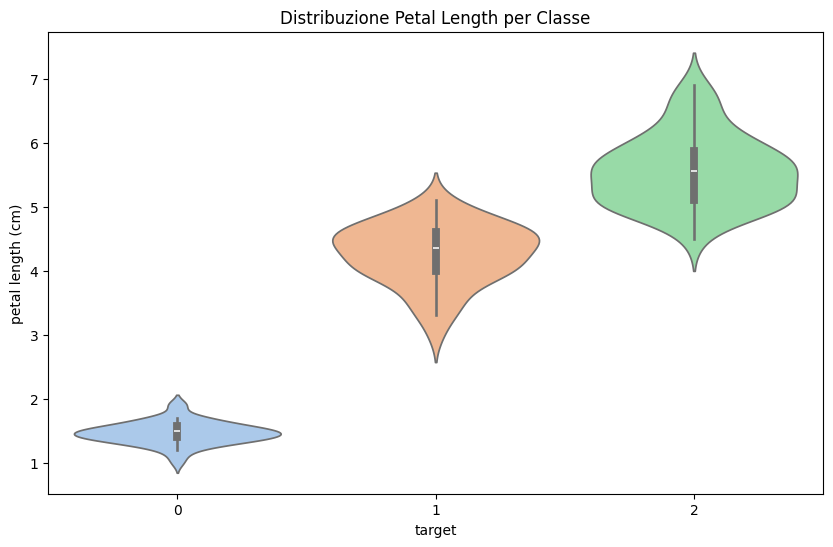

In [47]:
plt.figure(figsize=(10,6))
sns.violinplot(x="target", y="petal length (cm)", data=df, palette="pastel")
plt.title("Distribuzione Petal Length per Classe")
plt.show()